In [241]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

# Gyroscope Calibration

In [242]:
gyr_data = np.genfromtxt(fname='gyro2.csv', usecols=range(1, 17), delimiter=",", names=True)
gyr_x = np.linspace(0, np.shape(gyr_data)[0], np.shape(gyr_data)[0])
print("Samples: {}".format(np.shape(gyr_data)[0]))

Samples: 1007


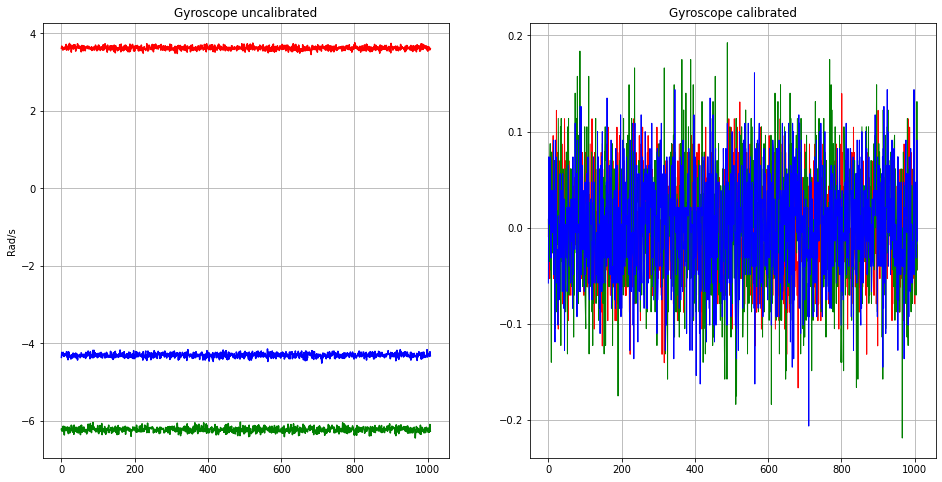

In [425]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # a figure with a single Axes
ax1.set_title("Gyroscope uncalibrated")
ax1.grid(True);
ax1.plot(gyr_x, gyr_data["gx"], color='r');
ax1.plot(gyr_x, gyr_data["gy"], color='g');
ax1.plot(gyr_x, gyr_data["gz"], color='b');
ax1.set(ylabel='Rad/s')

gyr_cal = np.array([np.average(gyr_data["gx"]), np.average(gyr_data["gy"]), np.average(gyr_data["gz"])]).round(4)

ax2.set_title("Gyroscope calibrated")
ax2.grid(True);
ax2.plot(gyr_x, gyr_data["gx"] - gyr_cal[0], color='r', linewidth=1, linestyle='-');
ax2.plot(gyr_x, gyr_data["gy"] - gyr_cal[1], color='g', linewidth=1, linestyle='-');
ax2.plot(gyr_x, gyr_data["gz"] - gyr_cal[2], color='b', linewidth=1, linestyle='-');

In [244]:
print("Gyroscope Calibration Data [rad/s]: " + str(gyr_cal))

Gyroscope Calibration Data [rad/s]: [ 3.623  -6.2299 -4.3086]


# Accelerometer Calibration (Single Axis, Az)

In [305]:
acc_ranges = np.r_[:250, 400:550, 600:700]
acc_data = np.genfromtxt(fname='acc2.csv', usecols=range(1, 17), delimiter=",", names=True)[acc_ranges]
acc_x = np.linspace(0, np.shape(acc_data)[0], np.shape(acc_data)[0])
print("Samples: {}".format(np.shape(acc_data)[0]))

Samples: 500


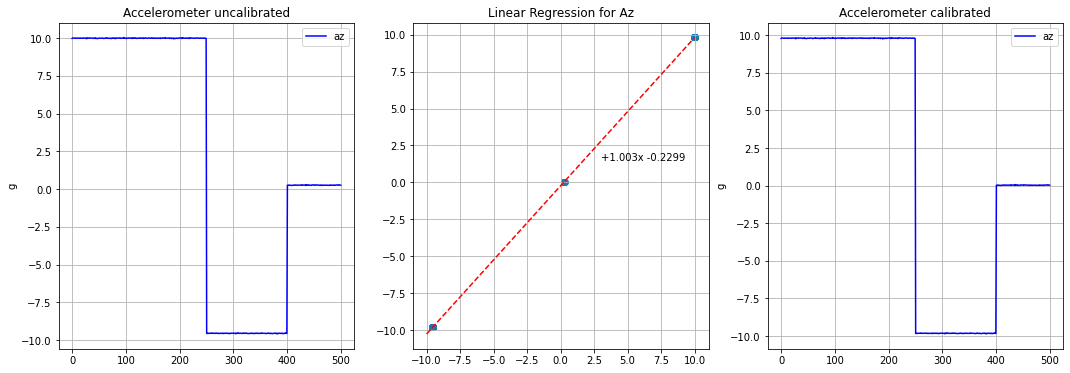

In [308]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  # a figure with a single Axes
ax1.set_title("Accelerometer uncalibrated")
ax1.grid(True);
#ax1.plot(acc_x, acc_data["ax"], color='r', label='ax');
#ax1.plot(acc_x, acc_data["ay"], color='g', label='ay');
ax1.plot(acc_x, acc_data["az"], color='b', label='az');
ax1.set(ylabel='g')
ax1.legend()

acc_ref = np.concatenate((np.full(250, 9.81), np.full(150, -9.81), np.full(100, 0)))

acc_res = stats.linregress(acc_data["az"], acc_ref)

ax2.set_title("Linear Regression for Az")
ax2.grid(True);
ax2.scatter(acc_data["az"], acc_ref)
ax2.plot(np.linspace(-10, 10, 10), acc_res.intercept + acc_res.slope*np.linspace(-10, 10, 10), "r--")
ax2.annotate('{:+.4}x {:+.4}'.format(acc_res.slope, acc_res.intercept), xy=(2, 1), xytext=(3, 1.5))

ax3.set_title("Accelerometer calibrated")
ax3.grid(True);
ax3.plot(acc_x, acc_data["az"]*acc_res.slope + acc_res.intercept, color='b', label='az');
ax3.set(ylabel='g')
ax3.legend();

In [309]:
print("Accelerometer Calibration Data: [{:+.4}x {:+.4}, ]".format(acc_res.slope, acc_res.intercept))

Accelerometer Calibration Data: [+1.003x -0.2299, ]


# Accelerometer Calibration (All Axes)

In [433]:
acc_data = np.genfromtxt(fname='acc4.csv', usecols=range(1, 17), delimiter=",", names=True)
acc_x = np.linspace(0, np.shape(acc_data)[0], np.shape(acc_data)[0])
print("Samples: {}".format(np.shape(acc_data)[0]))

Samples: 1690


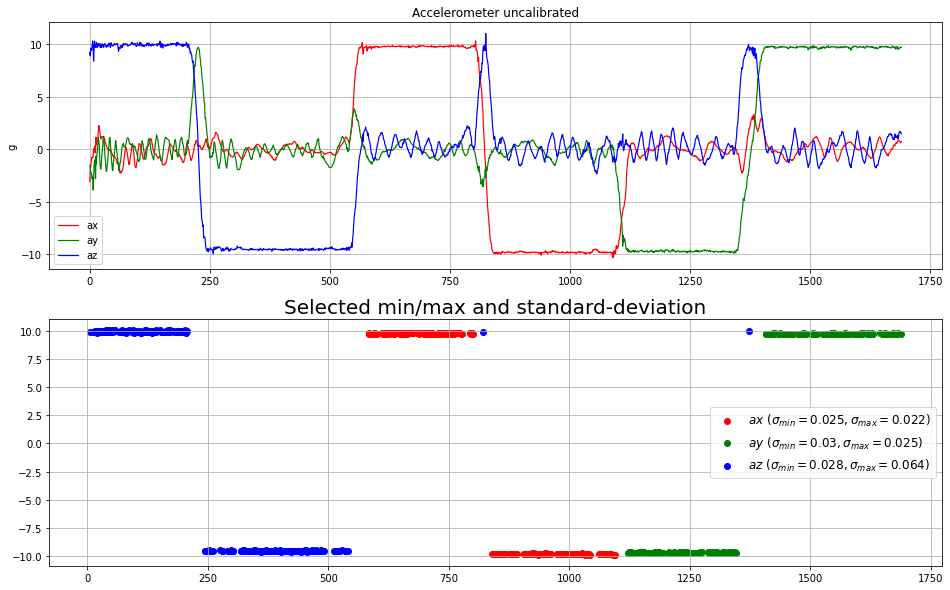

In [470]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))  # a figure with a single Axes
ax1.set_title("Accelerometer uncalibrated")
ax1.grid(True);
ax1.plot(acc_x, acc_data["ax"], color='red', linewidth=1.2, linestyle='-', label='ax');
ax1.plot(acc_x, acc_data["ay"], color='green', linewidth=1.2, linestyle='-', label='ay');
ax1.plot(acc_x, acc_data["az"], color='blue', linewidth=1.2, linestyle='-', label='az');
ax1.set(ylabel='g')
ax1.legend();

n_top = 150;
n_drop = int(n_top * 0.1);
acc_ax_max = np.argsort(acc_data["ax"])[-n_top:-n_drop]
acc_ax_min = np.argsort(acc_data["ax"])[n_drop:n_top]

acc_ay_max = np.argsort(acc_data["ay"])[-n_top:-n_drop]
acc_ay_min = np.argsort(acc_data["ay"])[n_drop:n_top]

acc_az_max = np.argsort(acc_data["az"])[-n_top:-n_drop]
acc_az_min = np.argsort(acc_data["az"])[n_drop:n_top]

ax2.set_title("Selected min/max and standard-deviation", fontsize=20)
ax2.grid(True);
ax2.scatter(acc_x[acc_ax_min], acc_data["ax"][acc_ax_min], color='r', label=r'$ax\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["ax"][acc_ax_min]), np.std(acc_data["ax"][acc_ax_max])));
ax2.scatter(acc_x[acc_ax_max], acc_data["ax"][acc_ax_max], color='r');
ax2.scatter(acc_x[acc_ay_min], acc_data["ay"][acc_ay_min], color='g', label=r'$ay\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["ay"][acc_ay_min]), np.std(acc_data["ay"][acc_ay_max])));
ax2.scatter(acc_x[acc_ay_max], acc_data["ay"][acc_ay_max], color='g');
ax2.scatter(acc_x[acc_az_min], acc_data["az"][acc_az_min], color='b', label=r'$az\ (\sigma_{{min}}={:.2}, \sigma_{{max}}={:.2})$'.format(np.std(acc_data["az"][acc_az_min]), np.std(acc_data["az"][acc_az_max])));
ax2.scatter(acc_x[acc_az_max], acc_data["az"][acc_az_max], color='b');

acc_ax_max_avg = np.mean(acc_data["ax"][acc_ax_max])
acc_ax_min_avg = np.mean(acc_data["ax"][acc_ax_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ax_min_avg, acc_ax_min_avg], "r-")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ax_max_avg, acc_ax_max_avg], "r-")

acc_ay_max_avg = np.mean(acc_data["ay"][acc_ay_max])
acc_ay_min_avg = np.mean(acc_data["ay"][acc_ay_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ay_min_avg, acc_ay_min_avg], "g--")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_ay_max_avg, acc_ay_max_avg], "g--")

acc_az_max_avg = np.mean(acc_data["az"][acc_az_max])
acc_az_min_avg = np.mean(acc_data["az"][acc_az_min])
#ax2.plot([0, np.shape(acc_data)[0]], [acc_az_min_avg, acc_az_min_avg], "b:")
#ax2.plot([0, np.shape(acc_data)[0]], [acc_az_max_avg, acc_az_max_avg], "b:")
ax2.legend(loc='center right', fontsize=12);

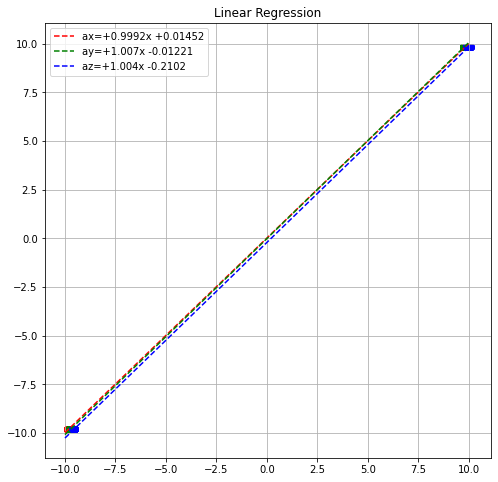

In [467]:
fig, ax = plt.subplots(figsize=(8, 8))  # a figure with a single Axes
ax.set_title("Linear Regression")
ax.grid(True);

acc_a_ref = np.concatenate((np.full(n_top-n_drop, -9.81), np.full(n_top-n_drop, 9.81)))
acc_ax_res = stats.linregress(np.concatenate((acc_data["ax"][acc_ax_min], acc_data["ax"][acc_ax_max])), acc_a_ref)
acc_ay_res = stats.linregress(np.concatenate((acc_data["ay"][acc_ay_min], acc_data["ay"][acc_ay_max])), acc_a_ref)
acc_az_res = stats.linregress(np.concatenate((acc_data["az"][acc_az_min], acc_data["az"][acc_az_max])), acc_a_ref)

ax.scatter(np.concatenate((acc_data["ax"][acc_ax_min], acc_data["ax"][acc_ax_max])), acc_a_ref, color='r');
ax.plot(np.linspace(-10, 10, 10), acc_ax_res.intercept + acc_ax_res.slope*np.linspace(-10, 10, 10), "r--", label='ax={:+.4}x {:+.4}'.format(acc_ax_res.slope, acc_ax_res.intercept))

ax.scatter(np.concatenate((acc_data["ay"][acc_ay_min], acc_data["ay"][acc_ay_max])), acc_a_ref, color='g');
ax.plot(np.linspace(-10, 10, 10), acc_ay_res.intercept + acc_ay_res.slope*np.linspace(-10, 10, 10), "g--", label='ay={:+.4}x {:+.4}'.format(acc_ay_res.slope, acc_ay_res.intercept))

ax.scatter(np.concatenate((acc_data["az"][acc_az_min], acc_data["az"][acc_az_max])), acc_a_ref, color='b');
ax.plot(np.linspace(-10, 10, 10), acc_az_res.intercept + acc_az_res.slope*np.linspace(-10, 10, 10), "b--", label='az={:+.4}x {:+.4}'.format(acc_az_res.slope, acc_az_res.intercept))

ax.legend();